# Usage Example
This example is based on that of scikit-learn, [Joint feature selection with multi-task Lasso](https://scikit-learn.org/stable/auto_examples/linear_model/plot_multi_task_lasso_support.html)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import MultiTaskLasso, Lasso

from pygflasso import MultiTaskGFLasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks // 2)
for k in range(n_relevant_features):
    coef[:n_tasks // 2, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))
    coef[n_tasks // 2:, k] = coef[:n_tasks // 2, k]

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

In [38]:
G = np.identity(n_tasks)
# G = np.zeros((n_tasks, n_tasks))
for j in range(n_tasks // 2):
    G[j, n_tasks // 2 + j] = G[n_tasks // 2 + j, j] = 1.0
gfl = MultiTaskGFLasso(G, verbose=True, max_iter=1000, lamb=2., eps=1.).fit(X, Y)
coef_multi_task_gflasso_ = gfl.coef_

Iter   1: diff = inf, loss = 7.073241e+03
Iter   2: diff = 3.809103e-04, loss = 7.045848e+03
Iter   3: diff = 5.523350e-04, loss = 7.007200e+03
Iter   4: diff = 7.096187e-04, loss = 6.958083e+03
Iter   5: diff = 8.619074e-04, loss = 6.898891e+03
Iter   6: diff = 1.010719e-03, loss = 6.830003e+03
Iter   7: diff = 1.156215e-03, loss = 6.751834e+03
Iter   8: diff = 1.298124e-03, loss = 6.664837e+03
Iter   9: diff = 1.436159e-03, loss = 6.569506e+03
Iter  10: diff = 1.569988e-03, loss = 6.466374e+03
Iter  11: diff = 1.699323e-03, loss = 6.356006e+03
Iter  12: diff = 1.823813e-03, loss = 6.238996e+03
Iter  13: diff = 1.943174e-03, loss = 6.115962e+03
Iter  14: diff = 2.057262e-03, loss = 5.987540e+03
Iter  15: diff = 2.165774e-03, loss = 5.854382e+03
Iter  16: diff = 2.268455e-03, loss = 5.717147e+03
Iter  17: diff = 2.365096e-03, loss = 5.576498e+03
Iter  18: diff = 2.455458e-03, loss = 5.433097e+03
Iter  19: diff = 2.539359e-03, loss = 5.287600e+03
Iter  20: diff = 2.616611e-03, loss = 5.

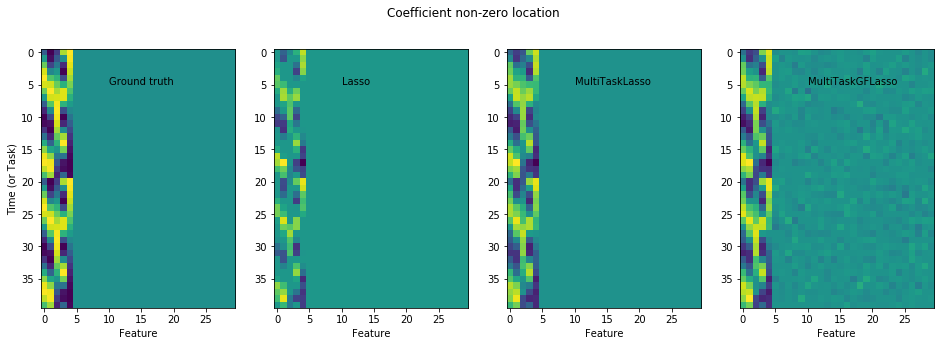

In [39]:
fig = plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 1)
plt.imshow(coef)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Ground truth')
plt.subplot(1, 4, 2)
plt.imshow(coef_lasso_)
plt.xlabel('Feature')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 4, 3)
plt.imshow(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.text(10, 5, 'MultiTaskLasso')
plt.subplot(1, 4, 4)
plt.imshow(coef_multi_task_gflasso_)
plt.xlabel('Feature')
plt.text(10, 5, 'MultiTaskGFLasso')
fig.suptitle('Coefficient non-zero location')
plt.show()

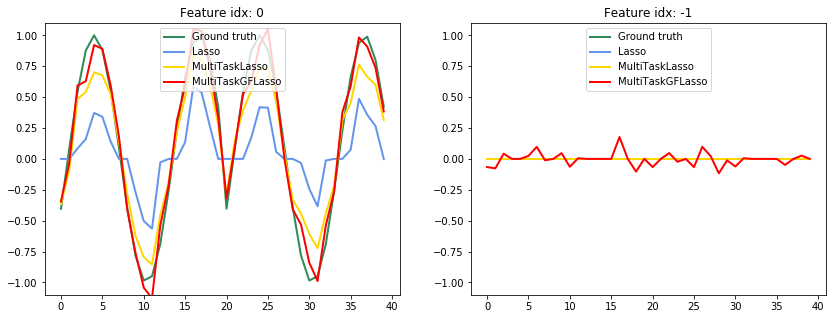

In [40]:

fig = plt.figure(figsize=(14, 5))
lw = 2

plt.subplot(1, 2, 1)
feature_to_plot = 0
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.plot(coef_multi_task_gflasso_[:, feature_to_plot], color='red', linewidth=lw,
         label='MultiTaskGFLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.title("Feature idx: {}".format(feature_to_plot))
plt.ylim([-1.1, 1.1])

plt.subplot(1, 2, 2)
feature_to_plot = -1
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.plot(coef_multi_task_gflasso_[:, feature_to_plot], color='red', linewidth=lw,
         label='MultiTaskGFLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.title("Feature idx: {}".format(feature_to_plot))
plt.ylim([-1.1, 1.1])

plt.show()